![image.png](attachment:image.png)

Integrantes: Cristobal Martinez (202373090-4), Gabriel Lira (202373054-8), Francisco Pino (202373051-3) y Catalina Zenteno (202373003-3)

#Introducción

El accidente cerebrovascular (ACV) representa una de las principales causas de discapacidad y mortalidad en el mundo. La detección temprana de los factores de riesgo asociados puede marcar una diferencia significativa en la prevención de estos eventos y en la mejora del pronóstico de los pacientes.

El objetivo de este proyecto es identificar la probabilidad de que un individuo sufra un ACV, a través del análisis exploratorio de datos. Para ello, se utilizarán herramientas estadísticas y representaciones gráficas que permitan reconocer patrones relevantes, relaciones entre variables y posibles señales de alerta temprana.

*A partir de esta problemática, nos planteamos las siguientes preguntas:*

    -¿Qué variables presentan una mayor asociación con la ocurrencia de un ACV?

    -¿Existen diferencias significativas en el riesgo de ACV según la edad o condiciones preexistentes?

    -¿Puede un análisis exploratorio ayudar a anticipar la probabilidad de ACV antes de que ocurran los síntomas?



In [1]:
# Librerías necesarias
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import expon

#from sklearn.model_selection import train_test_split
# Las comentadas son para futuro uso pero aún no están en uso

ImportError: cannot import name '_api' from partially initialized module 'matplotlib' (most likely due to a circular import) (c:\Users\Cata\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\__init__.py)

In [ ]:
# Nota
#Este notebook requiere tener instaladas las siguientes librerías:
#`pandas`, `numpy`, `matplotlib`, `seaborn`, `scikit-learn`, `notebook`
#Si no las tienes, ejecuta en la terminal:
#`pip install pandas numpy matplotlib seaborn scikit-learn notebook`

In [ ]:
#Lectura del archivo .csv
df = pd.read_csv("stroke-dataset.csv")

#Exploración de datos

In [ ]:
#Vista de los primeros datos
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#Muestra el tipo de dato de cada atributo
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Se observa el tipo cada columna de datos

In [ ]:
#Describe de todo el dataset
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Descripción general de los datos, mostrando la cantidad de datos, los mínimos, los máximos, y los cuartiles de cada columna.

In [ ]:
df['age'].mode() #Moda


0    78.0
Name: age, dtype: float64

La moda de la edad. Se puede observar que la edad que más se reptitió fueron 78 años.

In [ ]:
df['age'].median() #Mediana

np.float64(45.0)

La mediana de la edad. Se observa que el 50% de las personas tienen a lo más 45 años.

In [ ]:
#Describe con stroke == 1
df[df['stroke'] == 1].describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,249.000000,249.000000,249.000000,249.000000,249.000000,209.000000,249.0
mean,37115.068273,67.728193,0.265060,0.188755,132.544739,30.471292,1.0
std,21993.344872,12.727419,0.442254,0.392102,61.921056,6.329452,0.0
min,210.000000,1.320000,0.000000,0.000000,56.110000,16.900000,1.0
25%,17013.000000,59.000000,0.000000,0.000000,79.790000,26.400000,1.0
50%,36706.000000,71.000000,0.000000,0.000000,105.220000,29.700000,1.0
75%,56669.000000,78.000000,1.000000,0.000000,196.710000,33.700000,1.0
max,72918.000000,82.000000,1.000000,1.000000,271.740000,56.600000,1.0


Descripción general de los datos de las personas a las que les dió un stroke, mostrando la cantidad de datos, los mínimos, los máximos, y los cuartiles de cada columna.
Se observa que 249 personas tuvieron un stroke de las 5110 que se recolectaron datos. Además se puede observar que la mediana de las personas con stroke esta en los 71 años, lo cual es una edad avanzada, nivel de glucosa de 105,2, lo cual es alto y un bmi de 29,7, lo cual es conciderado sobrepeso.

In [ ]:
#Verifica la cantidad de datos NaN según categoría
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Se reconocen los valores nulos en la tabla, indicando que en la columna bmi hay 201 valores nulos.

In [ ]:
#Muestra si se conoce o no si es que fuma
fumadores_desconocidos = df[df["smoking_status"] == "Unknown"]
print(fumadores_desconocidos)
print((df["smoking_status"] == "Unknown").sum())

         id  gender   age  hypertension  heart_disease ever_married work_type  \
8     27419  Female  59.0             0              0          Yes   Private   
9     60491  Female  78.0             0              0          Yes   Private   
13     8213    Male  78.0             0              1          Yes   Private   
19    25226    Male  57.0             0              1           No  Govt_job   
23    64778    Male  82.0             0              1          Yes   Private   
...     ...     ...   ...           ...            ...          ...       ...   
5098    579    Male   9.0             0              0           No  children   
5101  36901  Female  45.0             0              0          Yes   Private   
5103  22127  Female  18.0             0              0           No   Private   
5104  14180  Female  13.0             0              0           No  children   
5109  44679  Female  44.0             0              0          Yes  Govt_job   

     Residence_type  avg_gl

Se reconocen las personas cuya información de si fuman es desconocida, siendo esta parte importante de la muestra.

In [ ]:
#Verificar si hay alguna edad sin sentido (outliers)
print("Edad máxima:", df['age'].max())
print("Edad minima:", df['age'].min())

Edad máxima: 82.0
Edad minima: 0.08


Se ve la edad mínima y la edad máxima que hay en los datos. Se confirma que no existen edades que no tengan sentido.

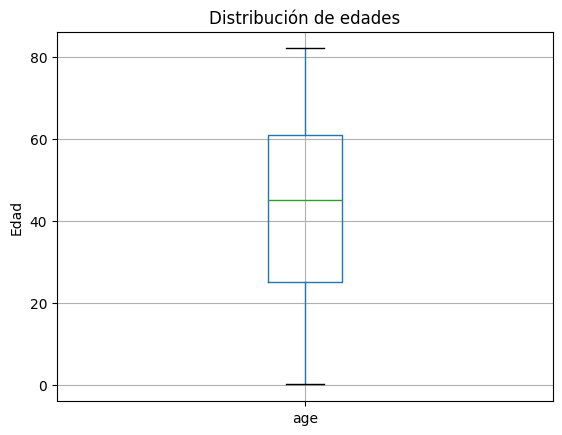

In [ ]:
#pip install matplotlib
#Verificar outliers edad
import matplotlib.pyplot as plt
df.boxplot(column='age')
plt.title('Distribución de edades')
plt.ylabel('Edad')

plt.show()

Gráfico de caja de las edades. Se observa que no existen outliers.

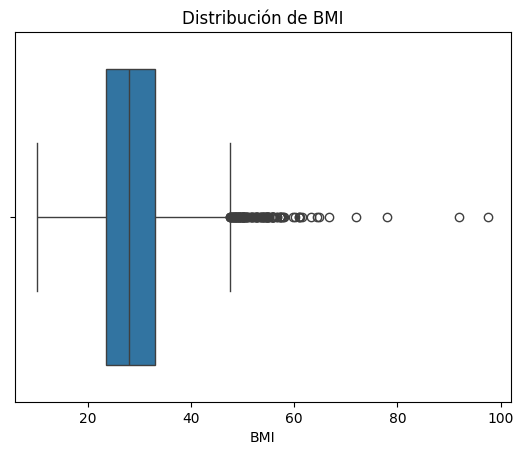

In [ ]:
import seaborn as sns

sns.boxplot(x=df['bmi'])
plt.title('Distribución de BMI')
plt.xlabel('BMI')
plt.show()


Gráfico de caja de los BMI, se observa que existen muchos outliers. Estos se explica ya que la mayoría de las personas suelen tener

Aquí podemos observar variedad de outliers, los cuales decidimos conservar pues creemos serán útiles para el análisis

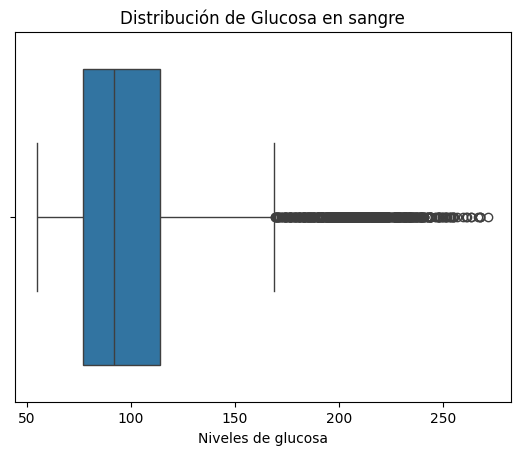

In [ ]:
sns.boxplot(x=df['avg_glucose_level'])
plt.title('Distribución de Glucosa en sangre')
plt.xlabel('Niveles de glucosa')
plt.show()


Lo mismo sucede acá, con mayor cantidad de outliers pero también conservados para el análisis

#Limpieza del dataset

En esta sección nos encargaremos de filtrar todo lo que no sirva para el análisis o que pueda contaminar los datos.

In [ ]:
#Cantidad de filas en el dataset antes de eliminación de NaN
len(df)

5110

In [ ]:
#Eliminar filas que contienen valores NaN
df = df.dropna(axis=0)

In [ ]:
#Cantidad de filas en el dataset post eliminación de NaN
len(df)

4909

In [ ]:
#Revisar si hay datos duplicados (no los borra en caso de existir)
duplicados = df.duplicated()
print(df[duplicados])

Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


Busca si existen filas con valores duplicados

In [ ]:
#Cantidad de filas antes de borrar outliers BMI
len(df)

4909

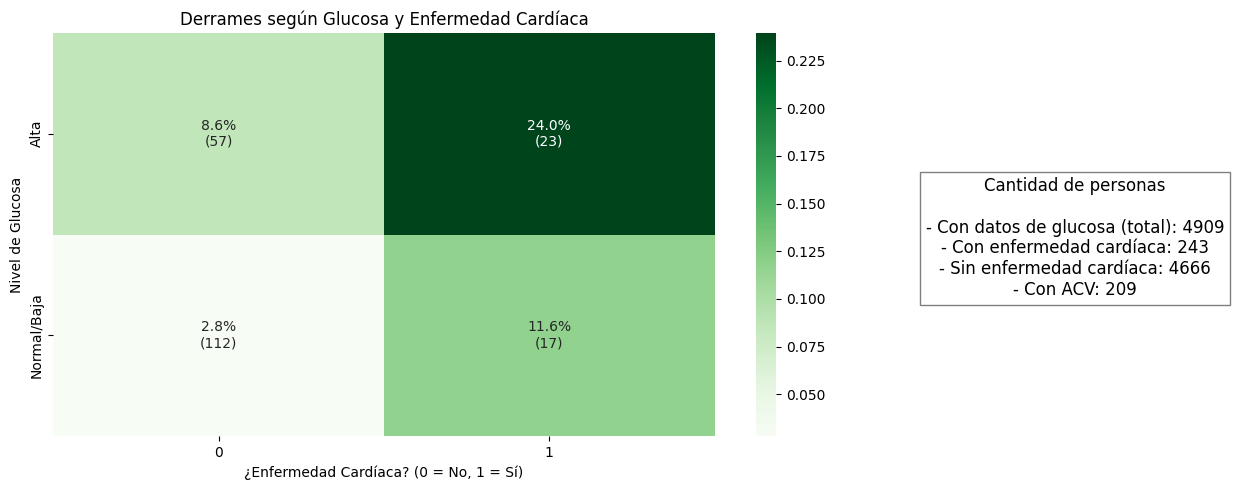

In [ ]:
df_grafico = df.copy()

# Filtrar datos válidos
df_grafico = df_grafico[df_grafico['stroke'].notna()]

# Categorizar glucosa
df_grafico['glucosa_cat'] = np.where(df_grafico['avg_glucose_level'] > 140, 'Alta', 'Normal/Baja')

# Porcentaje de stroke por grupo
prop_glucosa_heart = df_grafico.groupby(['glucosa_cat', 'heart_disease'], observed=True)['stroke'].mean().unstack()

# Cantidad de personas CON stroke por grupo
n_strokes = df_grafico[df_grafico['stroke'] == 1].groupby(['glucosa_cat', 'heart_disease'], observed=True).size().unstack()

# Crear anotaciones tipo "4.8%\n(n=21)"
anotaciones = prop_glucosa_heart.copy().astype(str)
for fila in prop_glucosa_heart.index:
    for col in prop_glucosa_heart.columns:
        pct = prop_glucosa_heart.loc[fila, col]
        n = n_strokes.loc[fila, col] if not pd.isna(n_strokes.loc[fila, col]) else 0
        if pd.isna(pct):
            anotaciones.loc[fila, col] = ""
        else:
            anotaciones.loc[fila, col] = f"{pct:.1%}\n({int(n)})"

# Totales para el cuadro lateral
cantidad_gente_glucosa = df_grafico['avg_glucose_level'].count()
cantidad_enfermedad_cardiaca = (df_grafico['heart_disease'] == 1).sum()
cantidad_sin_enfermedad_cardiaca = (df_grafico['heart_disease'] == 0).sum()
total_con_stroke = (df_grafico['stroke'] == 1).sum()

# Graficar heatmap
plt.figure(figsize=(9, 5))
sns.heatmap(prop_glucosa_heart, cmap="Greens", annot=anotaciones, fmt="", cbar=True)
plt.title("Derrames según Glucosa y Enfermedad Cardíaca")
plt.xlabel("¿Enfermedad Cardíaca? (0 = No, 1 = Sí)")
plt.ylabel("Nivel de Glucosa")



# Texto informativo a la derecha
plt.figtext(1.2, 0.4,
            f"Cantidad de personas\n\n"
            f"- Con datos de glucosa (total): {cantidad_gente_glucosa}\n"
            f"- Con enfermedad cardíaca: {cantidad_enfermedad_cardiaca}\n"
            f"- Sin enfermedad cardíaca: {cantidad_sin_enfermedad_cardiaca}\n"
            f"- Con ACV: {total_con_stroke}",
            fontsize=12, color="black", ha="center",
            bbox=dict(facecolor="white", alpha=0.5))


plt.tight_layout()
plt.show()

Con este mapa de calor podemos observar como los casos de ACV se concentran considerablemente más en las personas con enfermedad cardíaca

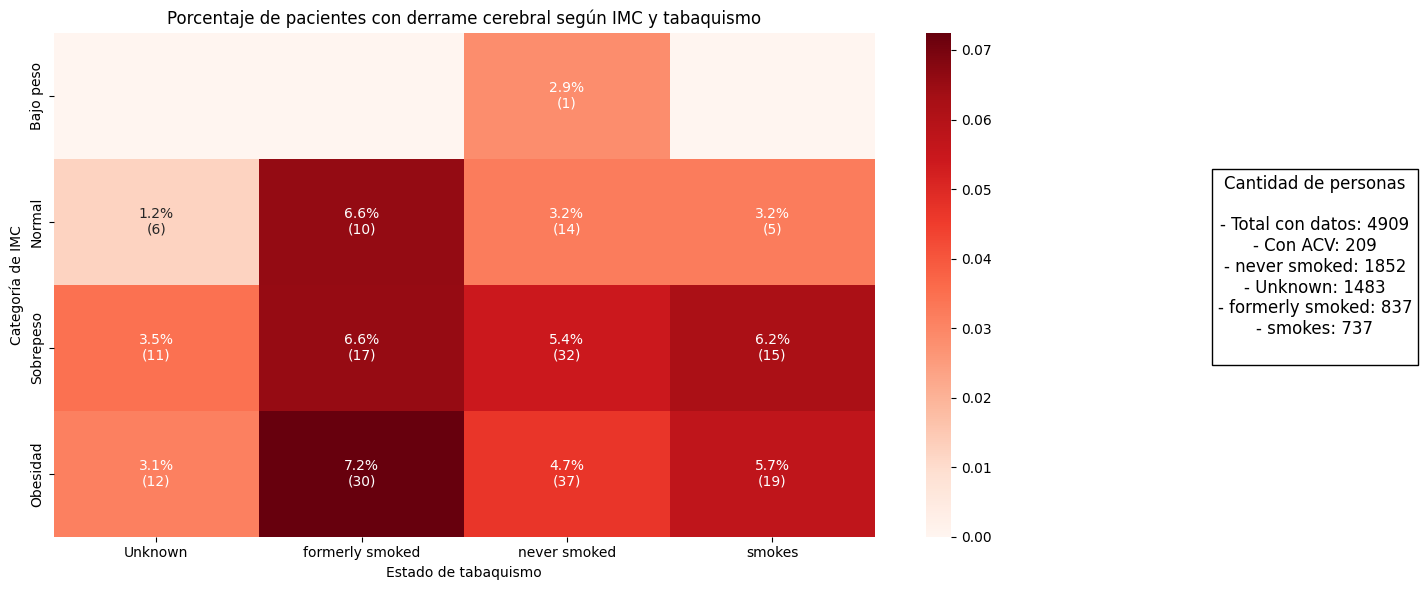

In [ ]:
df_grafico = df.copy()

# Categorizar IMC
bins = [0, 18.5, 24.9, 29.9, 100]
labels = ['Bajo peso', 'Normal', 'Sobrepeso', 'Obesidad']
df_grafico['bmi_cat'] = pd.cut(df_grafico['bmi'], bins=bins, labels=labels)


# Porcentaje de stroke
porcentaje = df_grafico.groupby(['bmi_cat', 'smoking_status'], observed=True)['stroke'].mean().unstack()

# Cantidad total por grupo
cantidad = df_grafico[df_grafico['stroke'] == 1].groupby(['bmi_cat', 'smoking_status'], observed=True).size().unstack()

# Anotaciones
anotaciones = porcentaje.copy().astype(str)
for fila in porcentaje.index:
    for col in porcentaje.columns:
        pct = porcentaje.loc[fila, col]
        n = cantidad.loc[fila, col]
        if pd.isna(pct) or pd.isna(n):
            anotaciones.loc[fila, col] = ""
        else:
            anotaciones.loc[fila, col] = f"{pct:.1%}\n({int(n)})"

# Totales para el cuadro informativo
total = len(df_grafico)
categorias_fumar = df_grafico['smoking_status'].value_counts(dropna=False)
total_con_stroke = (df_grafico['stroke'] == 1).sum()
texto_info = (
    f"Cantidad de personas\n\n"
    f"- Total con datos: {total}\n"
    f"- Con ACV: {total_con_stroke}\n"
)
for cat, count in categorias_fumar.items():
    texto_info += f"- {cat}: {count}\n"

# Gráfico
plt.figure(figsize=(11, 6))
sns.heatmap(porcentaje, cmap="Reds", annot=anotaciones, fmt="", cbar=True)
plt.title("Porcentaje de pacientes con derrame cerebral según IMC y tabaquismo")
plt.xlabel("Estado de tabaquismo")
plt.ylabel("Categoría de IMC")

# Cuadro al costado
plt.figtext(1.2, 0.4, texto_info,
            fontsize=12, color="black", ha="center",
            bbox=dict(facecolor="white", edgecolor="black"))

plt.tight_layout()
plt.show()

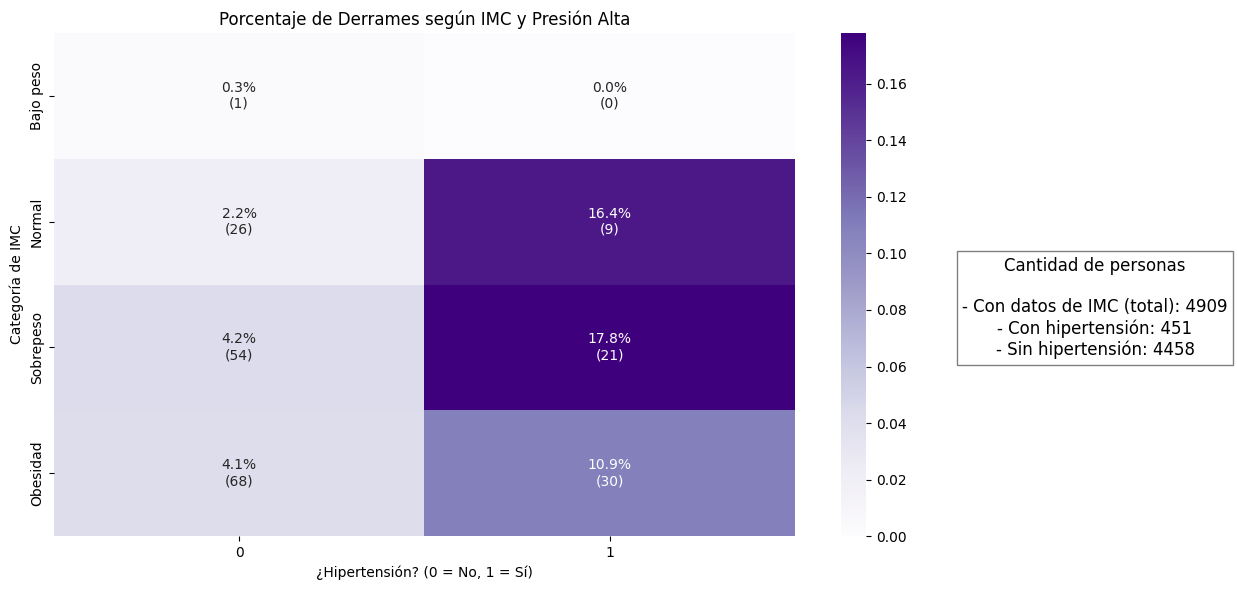

In [ ]:
df_grafico = df.copy()

# Filtrar para mantener solo los que tienen stroke definido
df_grafico = df_grafico[df_grafico['stroke'].notna()]

# Categorizar BMI
bins = [0, 18.5, 24.9, 29.9, 100]
labels = ['Bajo peso', 'Normal', 'Sobrepeso', 'Obesidad']
df_grafico['bmi_cat'] = pd.cut(df_grafico['bmi'], bins=bins, labels=labels)

# Porcentaje de stroke
prop_bmi_hyper = df_grafico.groupby(['bmi_cat', 'hypertension'], observed=True)['stroke'].mean().unstack()

# Cantidad de personas CON stroke por grupo (esto es lo nuevo)
n_stroke = df_grafico[df_grafico['stroke'] == 1].groupby(['bmi_cat', 'hypertension'], observed=True).size().unstack()

# Crear anotaciones tipo "4.8%\n(n=21)"
anotaciones = prop_bmi_hyper.copy().astype(str)

for fila in prop_bmi_hyper.index:
    for col in prop_bmi_hyper.columns:
        pct = prop_bmi_hyper.loc[fila, col]
        n = n_stroke.loc[fila, col] if not pd.isna(n_stroke.loc[fila, col]) else 0
        if pd.isna(pct):
            anotaciones.loc[fila, col] = ""
        else:
            anotaciones.loc[fila, col] = f"{pct:.1%}\n({int(n)})"

# Mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(prop_bmi_hyper, cmap="Purples", annot=anotaciones, fmt="", cbar=True)
plt.title("Porcentaje de Derrames según IMC y Presión Alta")
plt.xlabel("¿Hipertensión? (0 = No, 1 = Sí)")
plt.ylabel("Categoría de IMC")
plt.tight_layout()
cant_personas_bmi = df["bmi"].count()
cant_personas_con_hipertension = df[df["hypertension"] == 1]["hypertension"].count()
cant_personas_sin_hipertension = df[df["hypertension"] == 0]["hypertension"].count()
plt.figtext(1.1, 0.4,
    f"Cantidad de personas\n\n"
    f"- Con datos de IMC (total): {cant_personas_bmi}\n"
    f"- Con hipertensión: {cant_personas_con_hipertension}\n"
    f"- Sin hipertensión: {cant_personas_sin_hipertension}",
    fontsize=12, color="black", ha="center",
    bbox=dict(facecolor="white", alpha=0.5)
)
plt.show()



Con este mapa de calor se observa como el porcentaje de personas con stroke se concentra en personas con sobrepeso e hipertención.

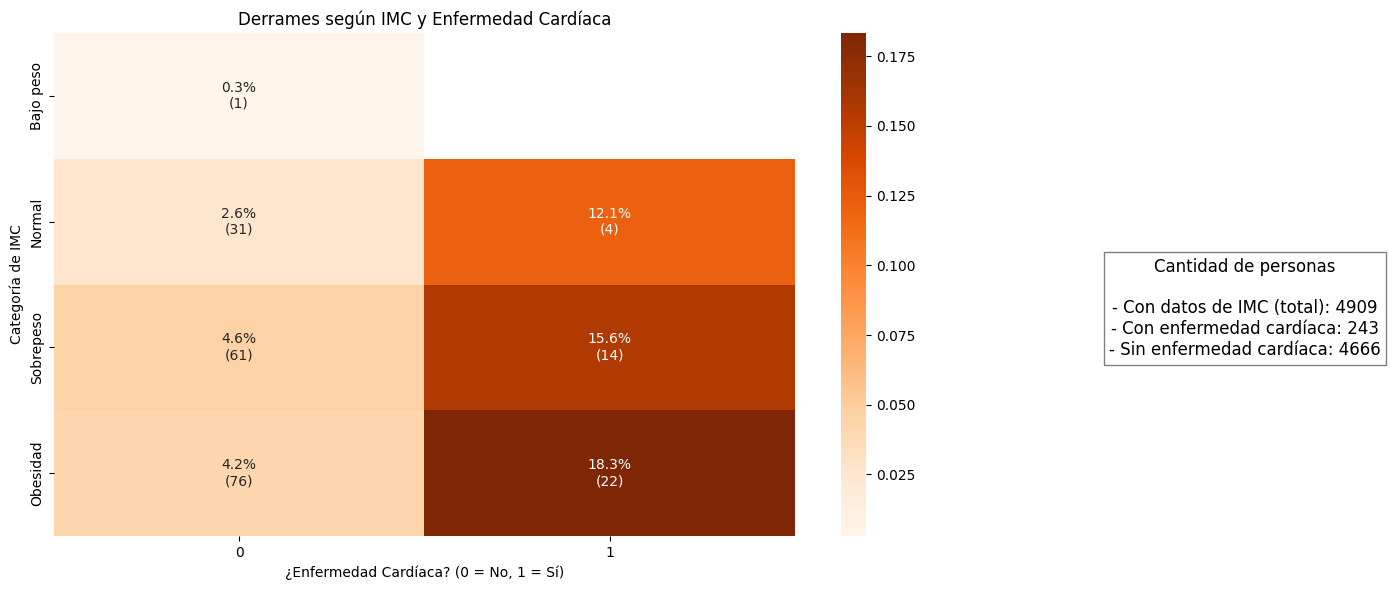

In [ ]:
df_grafico = df.copy()

# Asegurarse de excluir valores nulos en 'stroke'
df_grafico = df_grafico[df_grafico['stroke'].notna()]

# Categorizar IMC
bins = [0, 18.5, 24.9, 29.9, 100]
labels = ['Bajo peso', 'Normal', 'Sobrepeso', 'Obesidad']
df_grafico['bmi_cat'] = pd.cut(df_grafico['bmi'], bins=bins, labels=labels)

# Porcentaje de stroke por combinación
prop_bmi_heart = df_grafico.groupby(['bmi_cat', 'heart_disease'], observed=True)['stroke'].mean().unstack()

# Cantidad de personas con stroke en cada grupo
n_stroke = df_grafico[df_grafico['stroke'] == 1].groupby(['bmi_cat', 'heart_disease'], observed=True).size().unstack()

# Crear anotaciones tipo "4.8%\n(n=23)"
anotaciones = prop_bmi_heart.copy().astype(str)
for fila in prop_bmi_heart.index:
    for col in prop_bmi_heart.columns:
        pct = prop_bmi_heart.loc[fila, col]
        n = n_stroke.loc[fila, col] if not pd.isna(n_stroke.loc[fila, col]) else 0
        if pd.isna(pct):
            anotaciones.loc[fila, col] = ""
        else:
            anotaciones.loc[fila, col] = f"{pct:.1%}\n({int(n)})"

# Totales para cuadro informativo
cantidad_personas_imc = df_grafico['bmi'].count()
cantidad_con_enfermedad_cardiaca = (df_grafico['heart_disease'] == 1).sum()
cantidad_sin_enfermedad_cardiaca = (df_grafico['heart_disease'] == 0).sum()

# Mapa de calor
plt.figure(figsize=(10,6))
sns.heatmap(prop_bmi_heart, cmap="Oranges", annot=anotaciones, fmt="", cbar=True)

plt.title("Derrames según IMC y Enfermedad Cardíaca")
plt.xlabel("¿Enfermedad Cardíaca? (0 = No, 1 = Sí)")
plt.ylabel("Categoría de IMC")

# Cuadro informativo a la derecha
plt.figtext(1.25, 0.4,
            f"Cantidad de personas\n\n"
            f"- Con datos de IMC (total): {cantidad_personas_imc}\n"
            f"- Con enfermedad cardíaca: {cantidad_con_enfermedad_cardiaca}\n"
            f"- Sin enfermedad cardíaca: {cantidad_sin_enfermedad_cardiaca}",
            fontsize=12, color="black", ha="center",
            bbox=dict(facecolor="white", alpha=0.5))

plt.tight_layout()
plt.show()

Con el mapa de calor se puede observar que se concentra el mayor porcentaje de personas con stroke en personas con IMC alto y enfermedad cardiaca.

Decimos quedarnos con las variables:

*Principales*
- Edad  
- Glucosa  

*Secundarias*
- BMI  
- Enfermedad cardiaca


In [ ]:
#Mediana
df.groupby('stroke')[['age', 'avg_glucose_level', 'bmi', 'heart_disease']].median()

,age,avg_glucose_level,bmi,heart_disease
stroke,,,,
0,43.0,91.21,28.0,0.0
1,70.0,106.58,29.7,0.0


    Se observa que la mediana de la edad en personas con stroke es de 70, que corresponde a tercera edad, que el nivel de glucosa promedio es de 106 y el bmi de 29,7, ambos valores más altos de lo saludable.

In [ ]:
pd.crosstab(df['stroke'], df['hypertension'], normalize='index')

hypertension,0,1
stroke,,
0,0.916809,0.083191
1,0.712919,0.287081


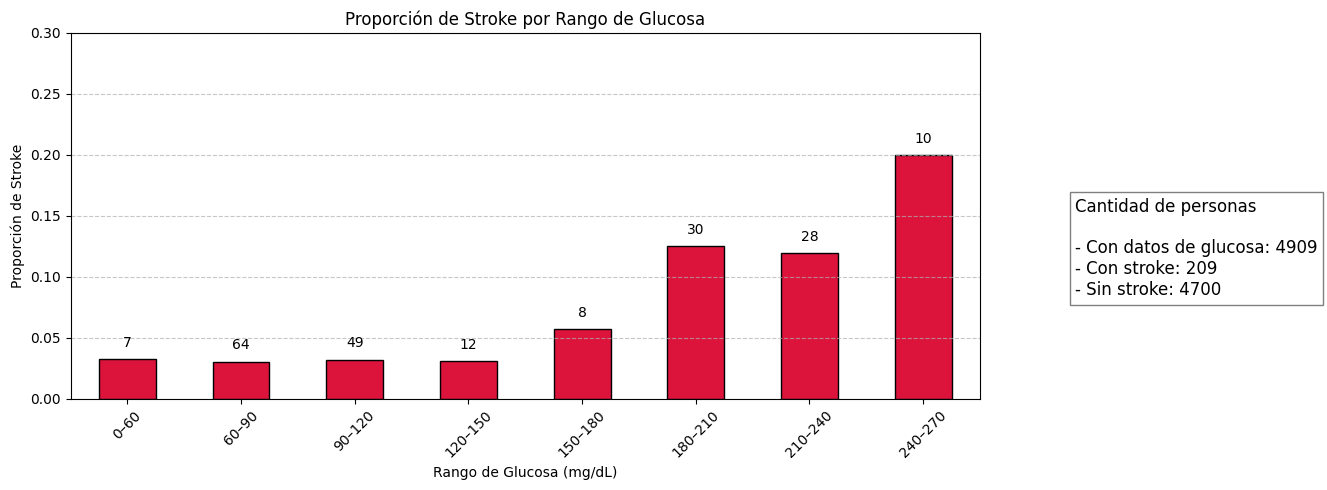

In [ ]:
# Crear columna de bins
bins = [0, 60, 90, 120, 150, 180, 210, 240, 270]
labels = [f'{bins[i]}–{bins[i+1]}' for i in range(len(bins)-1)]
df['glucose_bin'] = pd.cut(df['avg_glucose_level'], bins=bins, labels=labels, right=False)

# Proporción de stroke por bin
stroke_rates = df.groupby('glucose_bin', observed=True)['stroke'].mean()

# Cantidad de personas con stroke por bin
counts = df[df['stroke'] == 1].groupby('glucose_bin', observed=True).size()

# Gráfico
plt.figure(figsize=(10, 5))
bars = stroke_rates.plot(kind='bar', color='crimson', edgecolor='black')

# Anotar las cantidades sobre cada barra
for i, count in enumerate(counts):
    plt.text(i, stroke_rates.iloc[i] + 0.01, f'{count}', ha='center', fontsize=10)

# Título y etiquetas
plt.title('Proporción de Stroke por Rango de Glucosa')
plt.xlabel('Rango de Glucosa (mg/dL)')
plt.ylabel('Proporción de Stroke')
plt.ylim(0, 0.3)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Totales generales
cant_total = df['avg_glucose_level'].count()
cant_con_stroke = df[df['stroke'] == 1]['stroke'].count()
cant_sin_stroke = df[df['stroke'] == 0]['stroke'].count()

plt.figtext(1.08, 0.4,
    f"Cantidad de personas\n\n"
    f"- Con datos de glucosa: {cant_total}\n"
    f"- Con stroke: {cant_con_stroke}\n"
    f"- Sin stroke: {cant_sin_stroke}",
    fontsize=12, color="black", ha="left",
    bbox=dict(facecolor="white", alpha=0.5)
)

plt.tight_layout()
plt.show()

Gráfico de barra de la proporción de personas con stroke según rango de glucosa. Se puede observar que a medida que aumenta el nivel de glucosa, aumenta la probabilidad de tener un stroke.

<Figure size 1200x600 with 0 Axes>

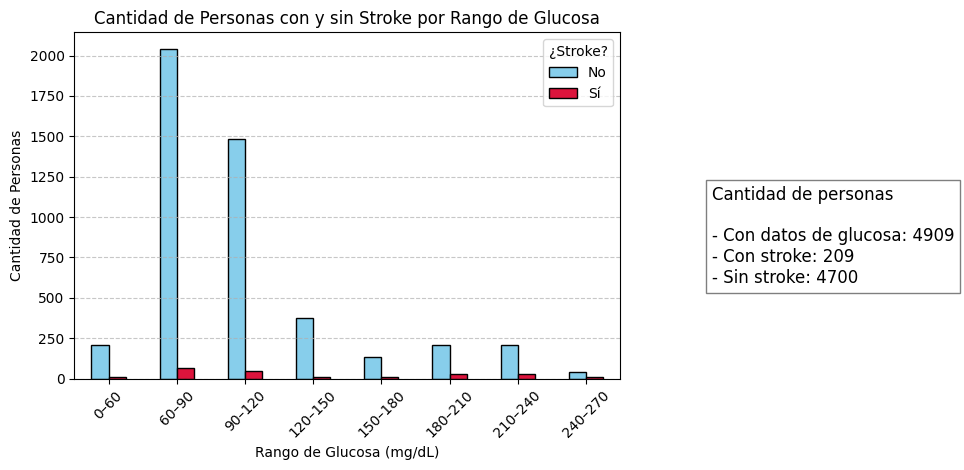

In [ ]:
# Crear bins
bins = [0, 60, 90, 120, 150, 180, 210, 240, 270]
labels = [f'{bins[i]}–{bins[i+1]}' for i in range(len(bins)-1)]

df['glucose_bin'] = pd.cut(df['avg_glucose_level'], bins=bins, labels=labels, right=False)

# Agrupar por bin y stroke (0 o 1), contar personas
stroke_bin_counts = df.groupby(['glucose_bin', 'stroke'], observed=True).size().unstack(fill_value=0)

# Gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
stroke_bin_counts.plot(kind='bar', stacked=False, color=['skyblue', 'crimson'], edgecolor='black')

plt.title('Cantidad de Personas con y sin Stroke por Rango de Glucosa')
plt.xlabel('Rango de Glucosa (mg/dL)')
plt.ylabel('Cantidad de Personas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='¿Stroke?', labels=['No', 'Sí'], loc='upper right')

# Cuadro resumen a la derecha
cant_total = df["avg_glucose_level"].count()
cant_con_stroke = df[df["stroke"] == 1]["stroke"].count()
cant_sin_stroke = df[df["stroke"] == 0]["stroke"].count()

plt.figtext(1.12, 0.4,
    f"Cantidad de personas\n\n"
    f"- Con datos de glucosa: {cant_total}\n"
    f"- Con stroke: {cant_con_stroke}\n"
    f"- Sin stroke: {cant_sin_stroke}",
    fontsize=12, color="black", ha="left",
    bbox=dict(facecolor="white", alpha=0.5)
)

plt.tight_layout()
plt.show()


Gráfico de la cantidad de personas con o sin stroke según rango de glucosa, podemos observar que en valores de glucosa más bajos hay más persoans que no les ha dado stroke.

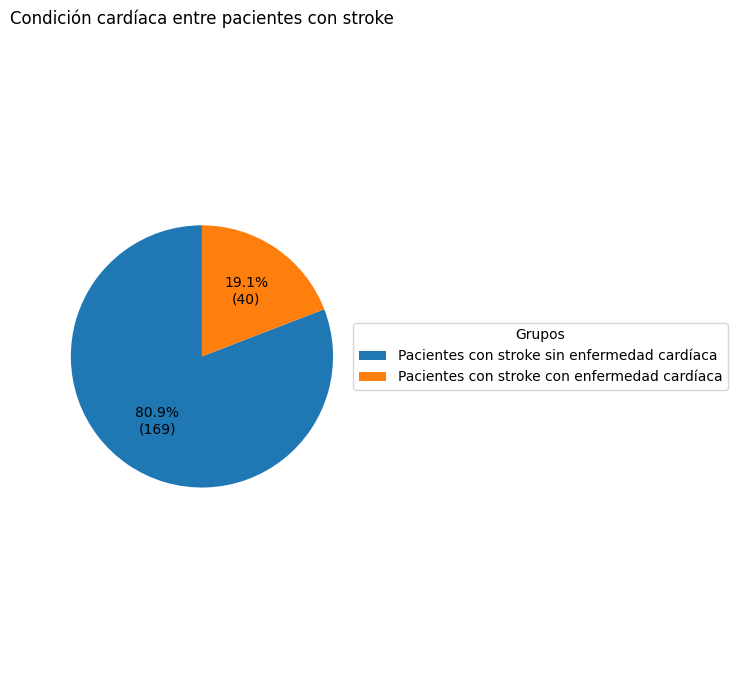

In [ ]:
# Filtramos solo las personas que han sufrido un stroke
con_stroke = df[df['stroke'] == 1]

# Contamos cuántos tienen o no tienen enfermedad cardíaca dentro del grupo de stroke
heart_cond_counts = con_stroke['heart_disease'].value_counts().sort_index()

# Etiquetas legibles (en el mismo orden)
labels = ["Sin condición cardíaca", "Con condición cardíaca"]

# Función para mostrar % y n
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f"{pct:.1f}%\n({count})"
    return my_autopct

# Crear gráfico de torta
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    heart_cond_counts,
    autopct=make_autopct(heart_cond_counts),
    startangle=90,
    textprops=dict(color="black")
)

# Leyenda descriptiva
plt.legend(
    wedges,
    ["Pacientes con stroke sin enfermedad cardíaca", "Pacientes con stroke con enfermedad cardíaca"],
    title="Grupos",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.title("Condición cardíaca entre pacientes con stroke")
plt.axis('equal')
plt.tight_layout()
plt.show()

Gráfico de torta de porcentaje de personas con enfermedad cardiaca dentro de los que sufrieron un stroke. Se observa que un 20% tenía enfermedades cardiacas.

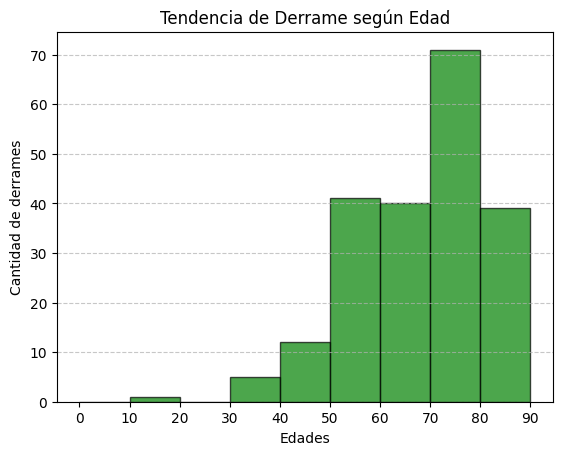

In [ ]:
#Nos ayudará para separar a los que si han tenido un derrame
df_stroke = df[df["stroke"] == 1]

bins = list(range(0, 100, 10))
plt.hist(df_stroke["age"], bins=bins, edgecolor="black", alpha=0.7, color='green')
plt.title('Tendencia de Derrame según Edad')
plt.xlabel('Edades')
plt.ylabel('Cantidad de derrames')
plt.xticks(bins)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Historigrama de cantidad de strokes según edad. Se observa q la mayor cantidad de strokes le sucedieron a personas de 70 a 80 años, lo cual es tercera edad.

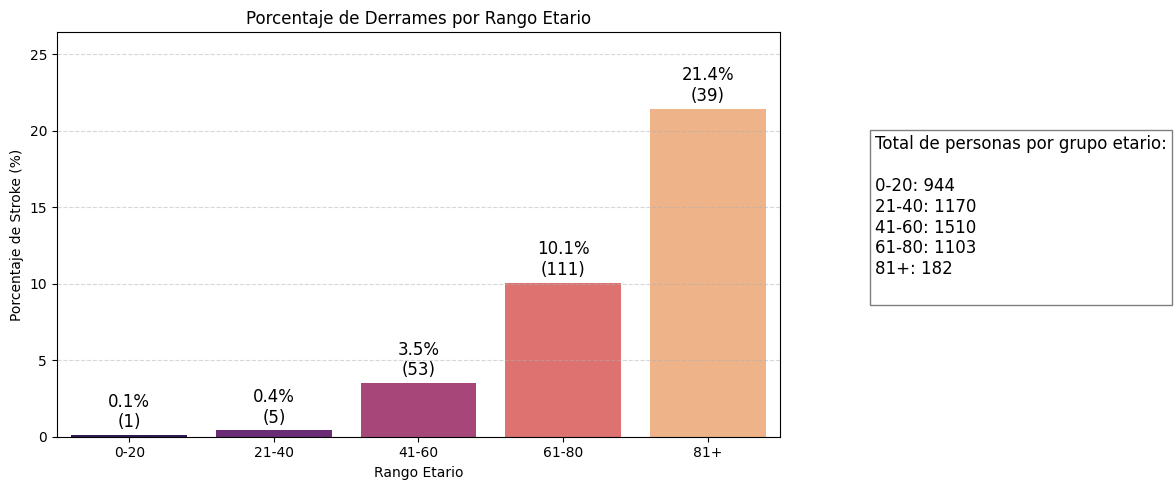

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_grafico = df.copy()

bins = [0, 20, 40, 60, 80, 120]
labels = ['0-20', '21-40', '41-60', '61-80', '81+']
df_grafico['rango_edad'] = pd.cut(df_grafico['age'], bins=bins, labels=labels, right=False)

porcentajes = df_grafico.groupby('rango_edad', observed=True)['stroke'].mean() * 100
df_barplot = porcentajes.reset_index(name='stroke_pct')

cantidad_por_rango = df_grafico.groupby('rango_edad', observed=True)['stroke'].sum()

df_barplot["labels"] = df_barplot.apply(
    lambda row: f"{row['stroke_pct']:.1f}%\n({cantidad_por_rango[row['rango_edad']]})", axis=1
)

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df_barplot, x='rango_edad', y='stroke_pct', hue='rango_edad',
                 palette="magma", legend=False)

ax.set_title("Porcentaje de Derrames por Rango Etario")
ax.set_xlabel("Rango Etario")
ax.set_ylabel("Porcentaje de Stroke (%)")
plt.ylim(0, df_barplot['stroke_pct'].max() + 5)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for i, bar in enumerate(ax.patches):
    ax.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 0.5,
        df_barplot["labels"].iloc[i],
        ha="center",
        fontsize=12,
        color="black"
    )

plt.tight_layout()
total_persons = df_grafico.groupby('rango_edad', observed=True)['age'].count()
legend_text = "Total de personas por grupo etario:\n\n"
for grupo, total in total_persons.items():
    legend_text += f"{grupo}: {total}\n"

plt.figtext(1.1, 0.4, legend_text, fontsize=12, bbox=dict(facecolor="white", alpha=0.5))

plt.show()


Gráfico con el porcentaje de stroke según rango etario. Se observa que mientras mayor es la edad, mayor es la probabilidad de tener un stroke.

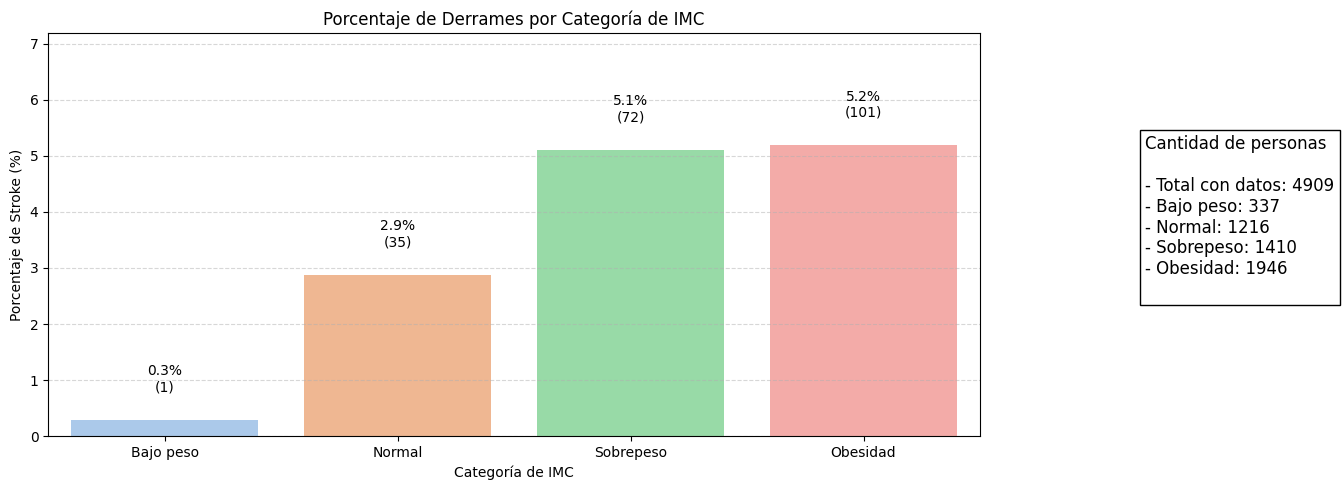

In [ ]:
df_grafico = df.copy()

# Categorizar IMC
bins_bmi = [0, 18.5, 24.9, 29.9, 100]
labels_bmi = ['Bajo peso', 'Normal', 'Sobrepeso', 'Obesidad']
df_grafico['bmi_cat'] = pd.cut(df_grafico['bmi'], bins=bins_bmi, labels=labels_bmi, right=False)

# Agrupación por categoría
df_bmi_plot = df_grafico.groupby('bmi_cat', observed=True).agg(
    n_total=('stroke', 'count'),
    n_stroke=('stroke', 'sum')
).reset_index()
df_bmi_plot['stroke_pct'] = (df_bmi_plot['n_stroke'] / df_bmi_plot['n_total']) * 100

# Preparar texto informativo
texto_info = (
    f"Cantidad de personas\n\n"
    f"- Total con datos: {df_grafico.shape[0]}\n"
)
for i, row in df_bmi_plot.iterrows():
    texto_info += f"- {row['bmi_cat']}: {int(row['n_total'])}\n"

# Crear gráfico
plt.figure(figsize=(10, 5))
sns.barplot(data=df_bmi_plot, x='bmi_cat', y='stroke_pct', hue='bmi_cat', palette='pastel', dodge=False, legend=False)

# Título y etiquetas
plt.title("Porcentaje de Derrames por Categoría de IMC")
plt.ylabel("Porcentaje de Stroke (%)")
plt.xlabel("Categoría de IMC")
plt.ylim(0, df_bmi_plot['stroke_pct'].max() + 2)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Etiquetas encima de las barras
for index, row in df_bmi_plot.iterrows():
    plt.text(index, row['stroke_pct'] + 0.5,
             f"{row['stroke_pct']:.1f}%\n({int(row['n_stroke'])})",
             ha='center', fontsize=10)

# Cuadro informativo al costado
plt.figtext(1.15, 0.4, texto_info,
            fontsize=12, color="black", ha="left",
            bbox=dict(facecolor="white", edgecolor="black"))

plt.tight_layout()
plt.show()

Gráfico de la probabilidad de tener un stroke segun el IMC. Se observa que pasando al nivel de sobrepeso, el porcentaje de stroke aumenta.

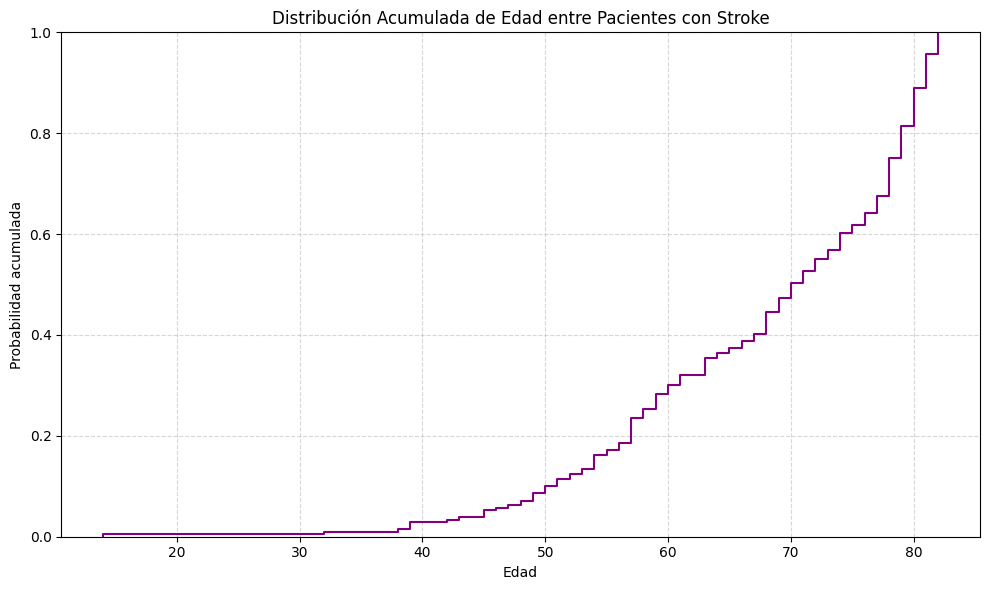

In [ ]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=df[df['stroke'] == 1], x='age', color='purple')
plt.title("Distribución Acumulada de Edad entre Pacientes con Stroke")
plt.xlabel("Edad")
plt.ylabel("Probabilidad acumulada")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Gráfico de distribución acumulada de la edad en pacientes con stroke. Se observa que desde los 55 años la probabilidad aumenta más rápidamente.

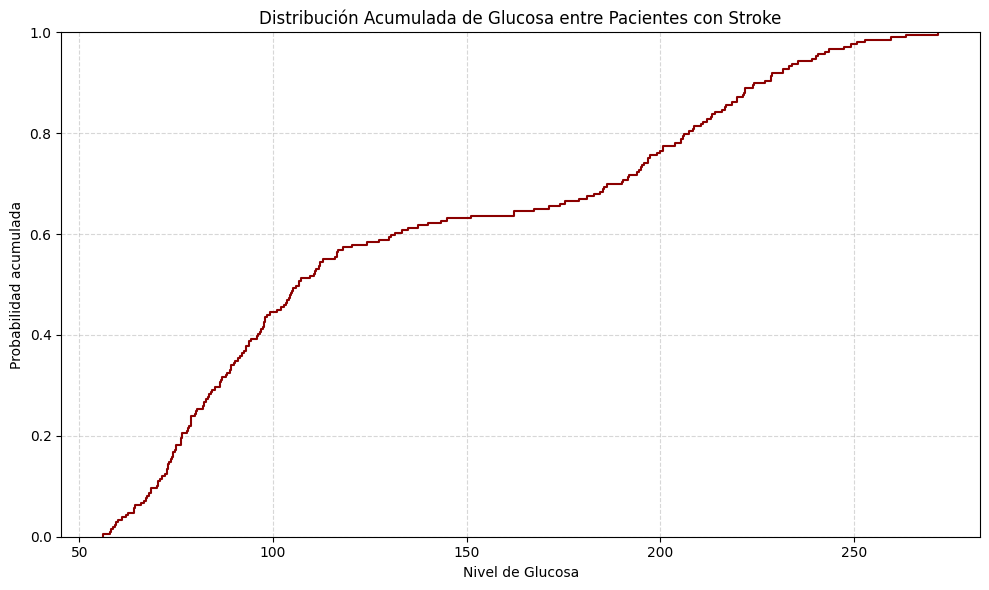

In [ ]:

df_sorted = df.sort_values('avg_glucose_level').reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.ecdfplot(data=df[df['stroke'] == 1], x='avg_glucose_level', color='darkred')
plt.title("Distribución Acumulada de Glucosa entre Pacientes con Stroke")
plt.xlabel("Nivel de Glucosa")
plt.ylabel("Probabilidad acumulada")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Gráfico de probabiliad acumulada de la glucosa en pacientes con stroke. Se observa que aumenta conciderablemente a medida que aumenta el nivel de glucosa hasta los 100, lo cual ya es un nivel poco sano, luego se mantiene, y vuelve a subir a los 200.

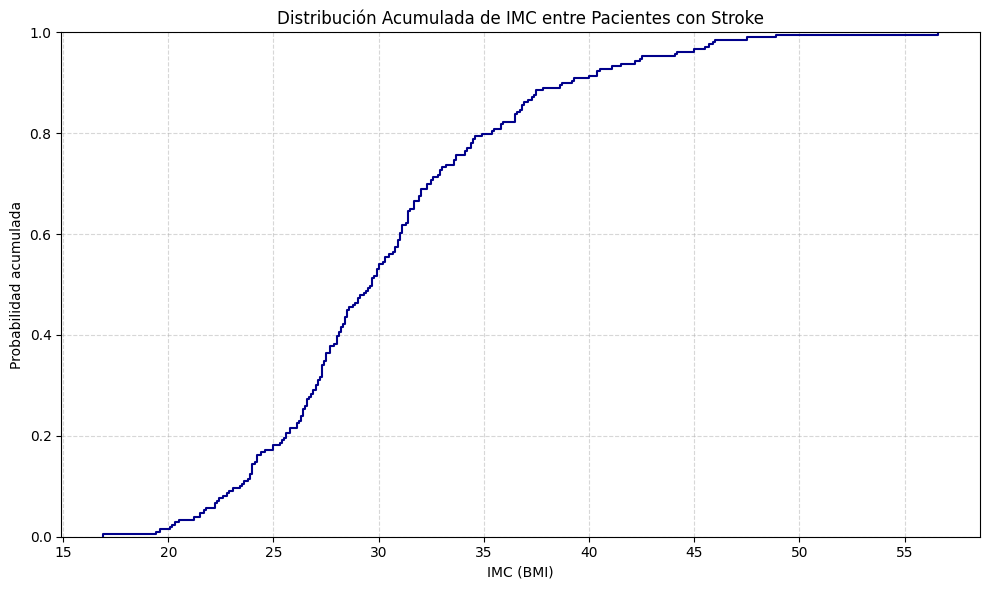

In [ ]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=df[df['stroke'] == 1], x='bmi', color='darkblue')
plt.title("Distribución Acumulada de IMC entre Pacientes con Stroke")
plt.xlabel("IMC (BMI)")
plt.ylabel("Probabilidad acumulada")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Gráfico de probabilidad acumulada de stroke según el IMC. Se observa que aumenta a medida que aumenta el IMC, pero una vez que llega al nivel de sobrepeso tiende a mantenerse.

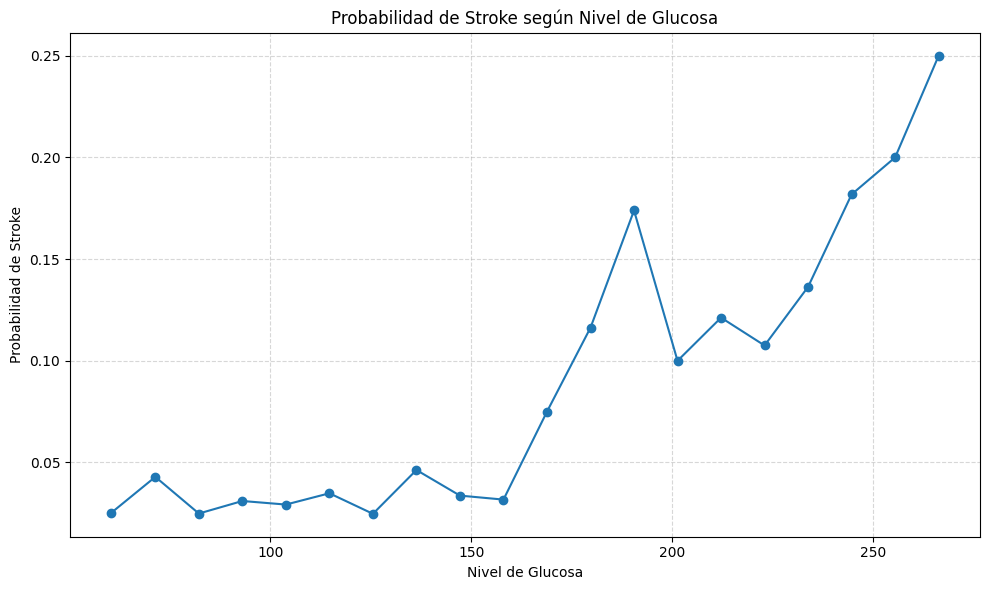

In [ ]:


df_plot = df.copy()
df_plot['glucose_bin'] = pd.cut(df_plot['avg_glucose_level'], bins=20)


prob_por_bin = df_plot.groupby('glucose_bin', observed=True)['stroke'].mean().reset_index()
prob_por_bin['glucose_centro'] = prob_por_bin['glucose_bin'].apply(lambda x: x.mid)


plt.figure(figsize=(10, 6))
plt.plot(prob_por_bin['glucose_centro'], prob_por_bin['stroke'], marker='o', linestyle='-')
plt.title("Probabilidad de Stroke según Nivel de Glucosa")
plt.xlabel("Nivel de Glucosa")
plt.ylabel("Probabilidad de Stroke")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Gráfico de probabilidad de stroke según nivel de glucosa. Se observa que existe un pick de probabilidad cerca de los 200, y que hay una tendencia al aumento de probabilidad a medida que aumenta el nivel de glucosa.

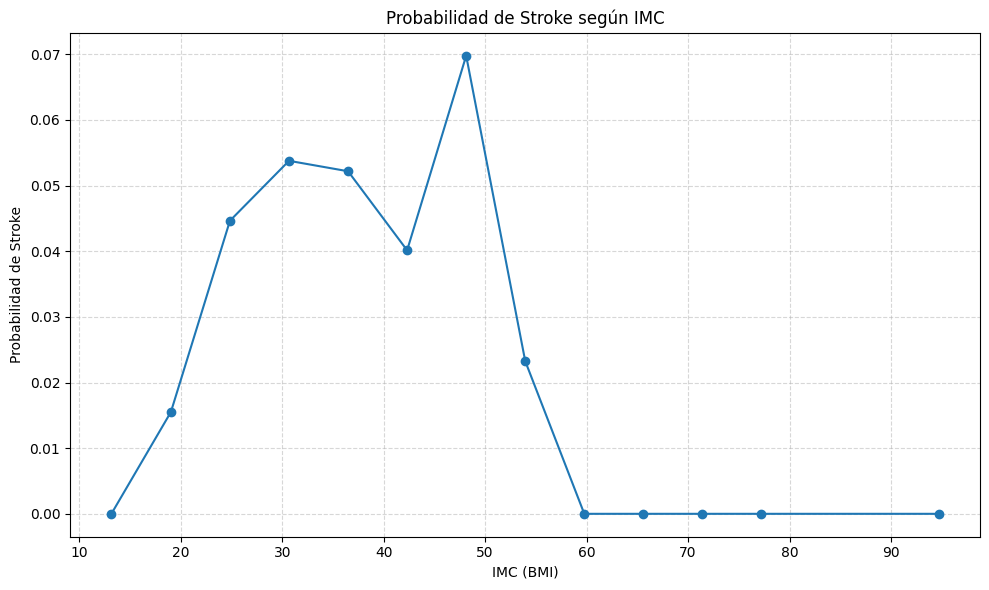

In [ ]:
df_plot = df.copy()

# Crear bins de IMC (podés ajustar la cantidad de bins)
df_plot['bmi_bin'] = pd.cut(df_plot['bmi'], bins=15)

# Calcular porcentaje de stroke por bin
prob_por_bmi = df_plot.groupby('bmi_bin', observed=True)['stroke'].mean().reset_index()
prob_por_bmi['bmi_centro'] = prob_por_bmi['bmi_bin'].apply(lambda x: x.mid)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(prob_por_bmi['bmi_centro'], prob_por_bmi['stroke'], marker='o', linestyle='-')
plt.title("Probabilidad de Stroke según IMC")
plt.xlabel("IMC (BMI)")
plt.ylabel("Probabilidad de Stroke")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Gráfico de probabilidad de stroke según el IMC. Se observa que aumenta a medida que aumenta el IMC, pero una vez que alcanza el nivel de "sobrepeso" el aumento de probabilidad no es tan grande. Los valores sobre 60 se pueden explicar porque hay muy poca gente con tal nivel de IMC.

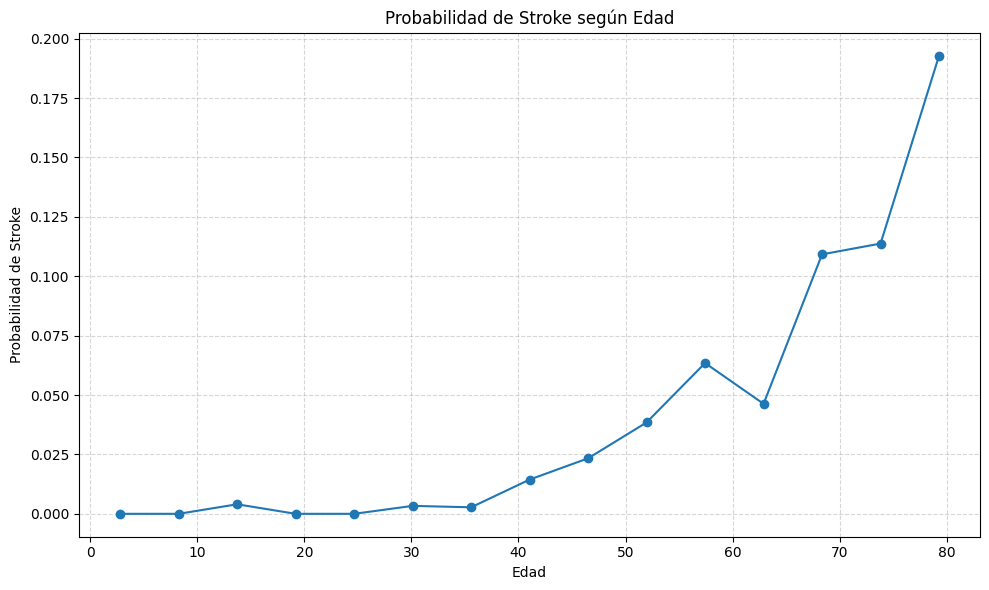

In [ ]:
df_plot = df.copy()

# Crear bins de edad (ajustables)
df_plot['age_bin'] = pd.cut(df_plot['age'], bins=15)

# Calcular proporción de strokes por grupo de edad
prob_por_edad = df_plot.groupby('age_bin', observed=True)['stroke'].mean().reset_index()
prob_por_edad['edad_centro'] = prob_por_edad['age_bin'].apply(lambda x: x.mid)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(prob_por_edad['edad_centro'], prob_por_edad['stroke'], marker='o', linestyle='-')
plt.title("Probabilidad de Stroke según Edad")
plt.xlabel("Edad")
plt.ylabel("Probabilidad de Stroke")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Gráfico de probabilidad de stroke según la edad. Se observa una tendencia a que aumenten las probabilidades a medida que aumenta la edad.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 1. Variables predictoras y objetivo
X = df[['age', 'avg_glucose_level']]
y = df['bmi']

# 2. Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Crear modelo
modelo = LinearRegression()

# 4. Entrenar modelo
modelo.fit(X_train, y_train)

# 5. Predecir sobre los datos de prueba
predicciones = modelo.predict(X_test)

# 6. Evaluar
from sklearn.metrics import mean_squared_error, r2_score
print("MSE:", mean_squared_error(y_test, predicciones))
print("R²:", r2_score(y_test, predicciones))


MSE: 61.37334788527144
R²: 0.10326072167030764


In [ ]:
print("Coeficientes:", modelo.coef_)  # para age y glucosa
print("Intercepto:", modelo.intercept_)


Coeficientes: [0.10705862 0.01927656]
Intercepto: 22.218696957833853


HIPÓTESIS A CONSIDERAR:
        Las personas con niveles altos de glucosa en sangre y antecedentes de enfermedades cardíacas tienen una mayor probabilidad de sufrir un accidente cerebrovascular

 Transformación Inversa

----- Estimación de Parámetros -----
Método de Momentos: alpha = 3.6125, beta = 11.8657
Máxima Verosimilitud: alpha = 2.0308, beta = 21.1074


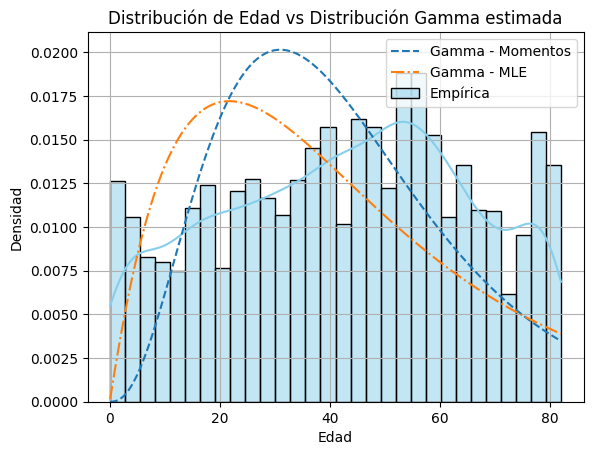

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.optimize import minimize

# --- Datos  ---
data = df['age'].values

# --- MÉTODO DE LOS MOMENTOS ---
mu = np.mean(data)
var = np.var(data)

alpha_mm = mu**2 / var
beta_mm = var / mu

# --- MÉTODO DE MÁXIMA VEROSIMILITUD ---
def neg_log_likelihood(params):
    a, b = params
    return -np.sum(stats.gamma.logpdf(data, a, scale=b))

init_params = [alpha_mm, beta_mm]

res = minimize(neg_log_likelihood, init_params, bounds=[(0.01, None), (0.01, None)])
alpha_mle, beta_mle = res.x

# --- Mostrar resultados ---
print("----- Estimación de Parámetros -----")
print(f"Método de Momentos: alpha = {alpha_mm:.4f}, beta = {beta_mm:.4f}")
print(f"Máxima Verosimilitud: alpha = {alpha_mle:.4f}, beta = {beta_mle:.4f}")

# --- GRAFICAR ---
sns.histplot(data, kde=True, stat='density', bins=30, color='skyblue', label='Empírica')

x = np.linspace(min(data), max(data), 500)

# fdp estimada por Momentos
plt.plot(x, stats.gamma.pdf(x, alpha_mm, scale=beta_mm), '--', label='Gamma - Momentos')

# fdp estimada por MLE
plt.plot(x, stats.gamma.pdf(x, alpha_mle, scale=beta_mle), '-.', label='Gamma - MLE')

plt.title('Distribución de Edad vs Distribución Gamma estimada')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()


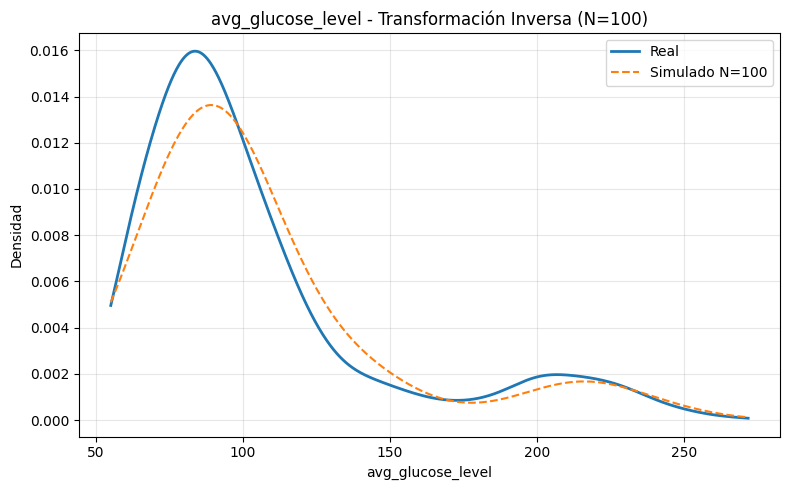

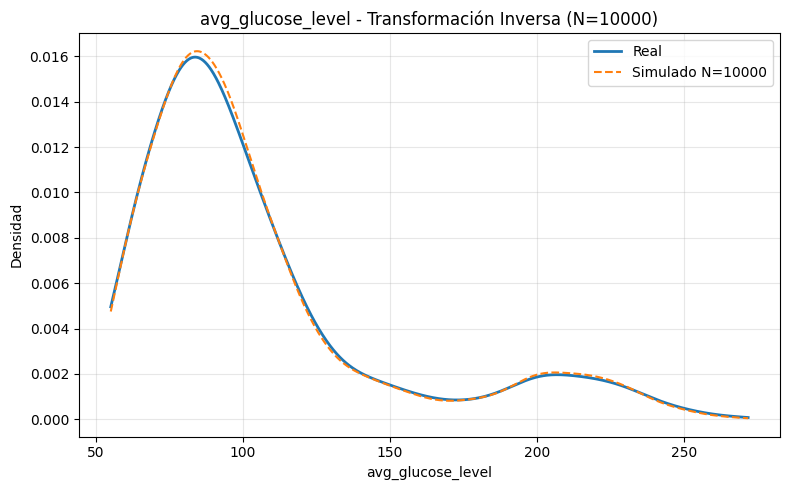

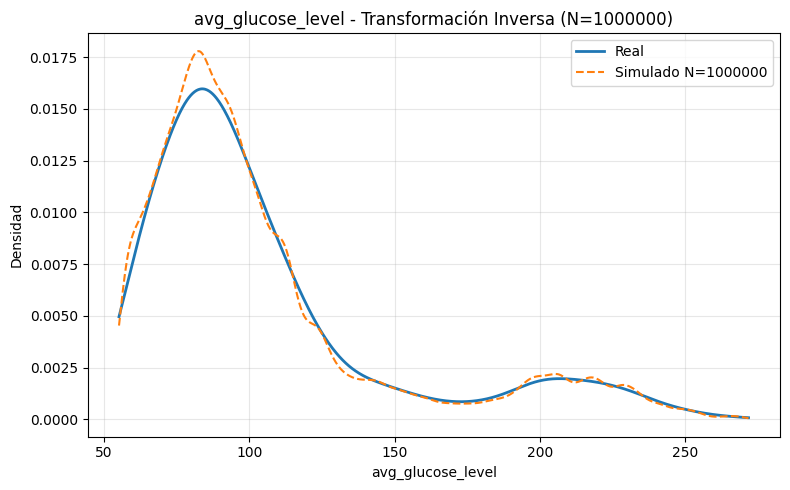

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

def simular_transformacion_inversa(df, variable, N_list=[10**2, 10**4, 10**6]):
    data = df[variable].dropna()
    sorted_data = np.sort(data)
    cdf_y = np.arange(1, len(sorted_data)+1) / len(sorted_data)

    def inversa(u):
        return np.interp(u, cdf_y, sorted_data)

    for N in N_list:
        u = np.random.uniform(0, 1, N)
        simulados = inversa(u)

        kde_real = gaussian_kde(data)
        kde_sim = gaussian_kde(simulados)
        x_range = np.linspace(min(data), max(data), 1000)

        plt.figure(figsize=(8, 5))
        plt.plot(x_range, kde_real(x_range), label="Real", linewidth=2)
        plt.plot(x_range, kde_sim(x_range), label=f"Simulado N={N}", linestyle='--')
        plt.title(f"{variable} - Transformación Inversa (N={N})")
        plt.xlabel(variable)
        plt.ylabel("Densidad")
        plt.grid(alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()
simular_transformacion_inversa(df, 'avg_glucose_level')


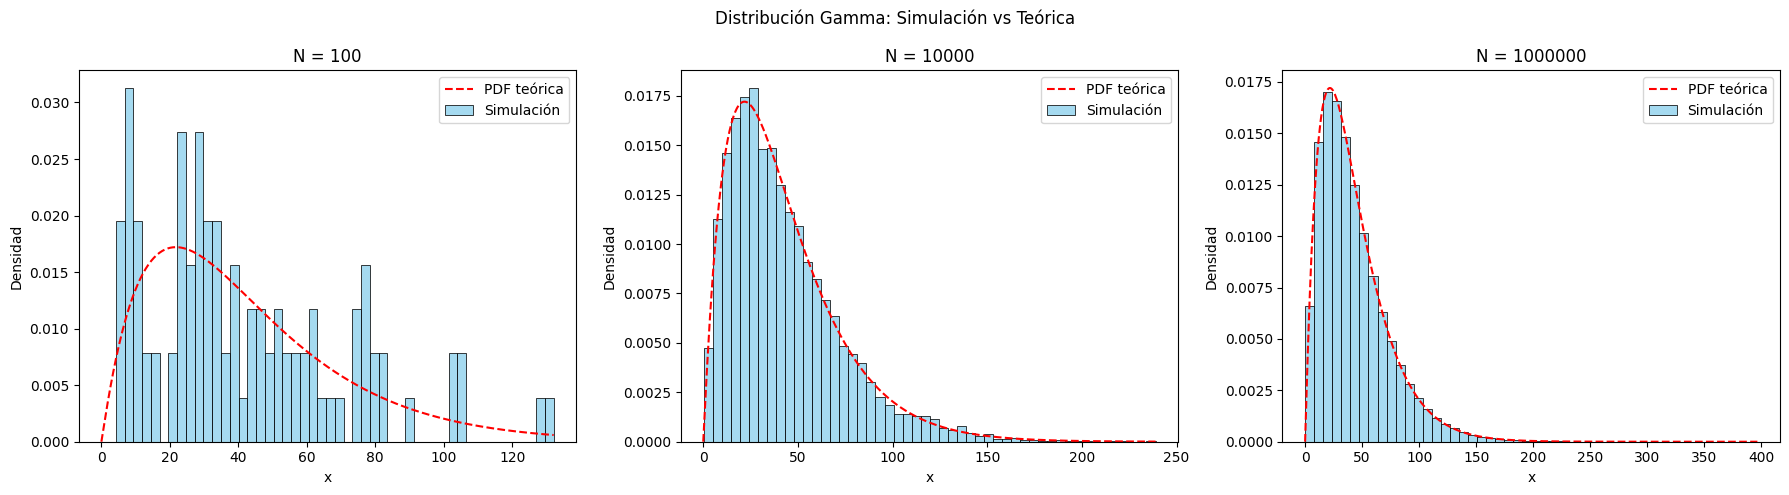

In [ ]:
from scipy.stats import gamma

# Parámetros estimados
alpha = alpha_mle  # o alpha_mm
beta = beta_mle    # o beta_mm

Ns = [10**2, 10**4, 10**6]

plt.figure(figsize=(18, 5))

for i, N in enumerate(Ns, 1):
    simulacion = gamma.rvs(a=alpha, scale=beta, size=N)

    plt.subplot(1, 3, i)
    sns.histplot(simulacion, bins=50, stat='density', color='skyblue', label='Simulación')

    x = np.linspace(0, np.max(simulacion), 500)
    plt.plot(x, gamma.pdf(x, a=alpha, scale=beta), 'r--', label='PDF teórica')

    plt.title(f"N = {N}")
    plt.xlabel("x")
    plt.ylabel("Densidad")
    plt.legend()

plt.suptitle("Distribución Gamma: Simulación vs Teórica")
plt.tight_layout()
plt.show()


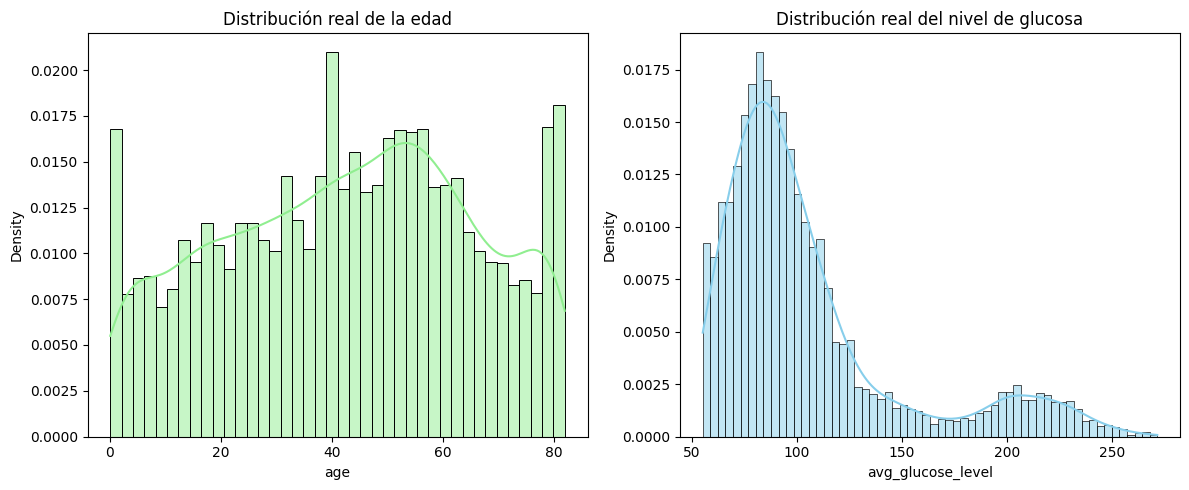

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Eliminar valores faltantes si los hay
df = df.dropna(subset=["age", "avg_glucose_level"])

# Visualizar las distribuciones reales con más bins
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df["age"], kde=True, stat="density", bins=40, color="lightgreen", edgecolor='black')
plt.title("Distribución real de la edad")
plt.xlabel("age")

plt.subplot(1, 2, 2)
sns.histplot(df["avg_glucose_level"], kde=True, stat="density", bins=60, color="skyblue", edgecolor='black')
plt.title("Distribución real del nivel de glucosa")
plt.xlabel("avg_glucose_level")

plt.tight_layout()
plt.show()


Test


In [ ]:
import scipy.stats as st
# --- Ajuste de parámetros (MLE) ---
# Normal para age
ages = df['age']
glucose = df['avg_glucose_level']
mu_norm, sigma_norm = st.norm.fit(ages)
print(f"Edad  →  µ̂={mu_norm:.2f},  σ̂={sigma_norm:.2f}")

# Gamma para avg_glucose_level  (loc=0)
alpha_g, loc_g, theta_g = st.gamma.fit(glucose, floc=0)
print(f"Glucosa → α̂={alpha_g:.2f}, θ̂={theta_g:.2f} (loc fijado a 0)")


Edad  →  µ̂=42.87,  σ̂=22.55
Glucosa → α̂=7.25, θ̂=14.52 (loc fijado a 0)


In [ ]:
# --- Funciones auxiliares de simulación ---
rng = np.random.default_rng(42)  # semilla reproducible

def sim_norm(mu, sigma, N, rng):
    u = rng.random(N)
    return st.norm.ppf(u, loc=mu, scale=sigma)   # Transformación Inversa

def sim_gamma(alpha, theta, N, rng):
    u = rng.random(N)
    return st.gamma.ppf(u, a=alpha, loc=0, scale=theta)  # loc=0 forzado


In [ ]:
# --- Función para graficar ---
def plot_compare(real_series, sim_series, dist_pdf, xgrid, N, title):
    plt.figure(figsize=(7,4))
    sns.histplot(sim_series, bins=30, stat="density",
                 alpha=0.45, edgecolor="white",
                 label=f"Simulado (N={N:,})")
    plt.plot(xgrid, dist_pdf, lw=2, label="PDF teórica")
    sns.kdeplot(real_series, lw=2, color="black", label="Datos reales (KDE)")
    plt.title(title)
    plt.xlabel(real_series.name)
    plt.legend()
    plt.show()


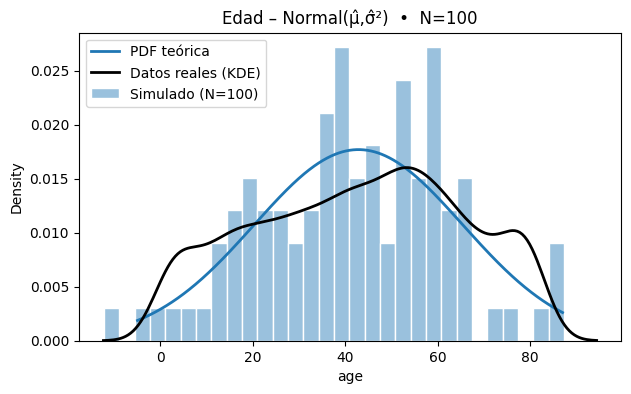

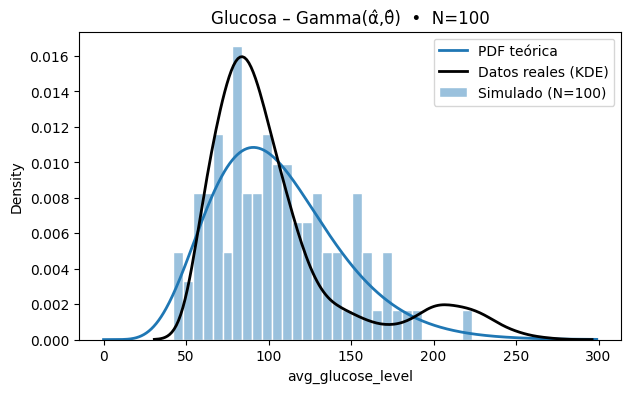

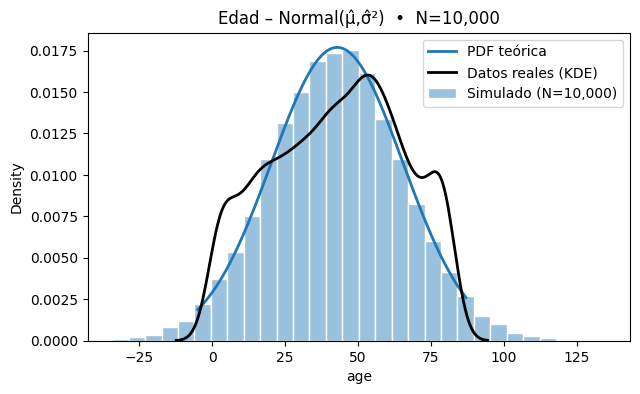

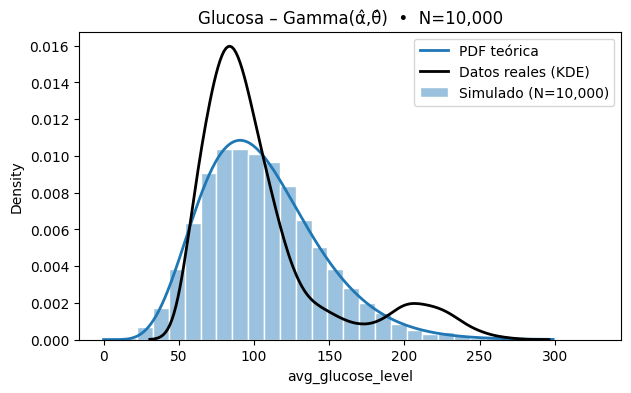

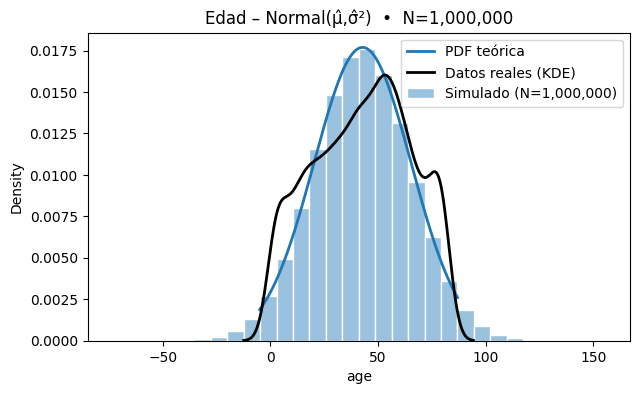

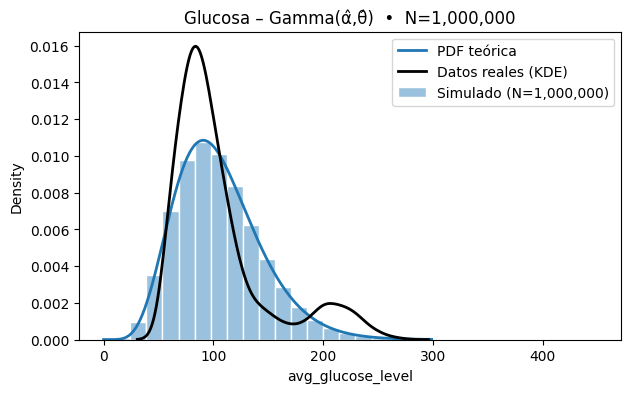

In [ ]:
# --- Simulación y gráficos para cada N ---
for N in [10**2, 10**4, 10**6]:
    # ---- Edad (Normal) ----
    sim_age = sim_norm(mu_norm, sigma_norm, N, rng)
    x_age = np.linspace(ages.min()-5, ages.max()+5, 600)
    pdf_age = st.norm.pdf(x_age, loc=mu_norm, scale=sigma_norm)
    plot_compare(ages, sim_age, pdf_age, x_age, N,
                 title=f"Edad – Normal(µ̂,σ̂²)  •  N={N:,}")

    # ---- Glucosa (Gamma) ----
    sim_glu = sim_gamma(alpha_g, theta_g, N, rng)
    x_glu = np.linspace(0, glucose.max()*1.1, 600)
    pdf_glu = st.gamma.pdf(x_glu, a=alpha_g, loc=0, scale=theta_g)
    plot_compare(glucose, sim_glu, pdf_glu, x_glu, N,
                 title=f"Glucosa – Gamma(α̂,θ̂)  •  N={N:,}")


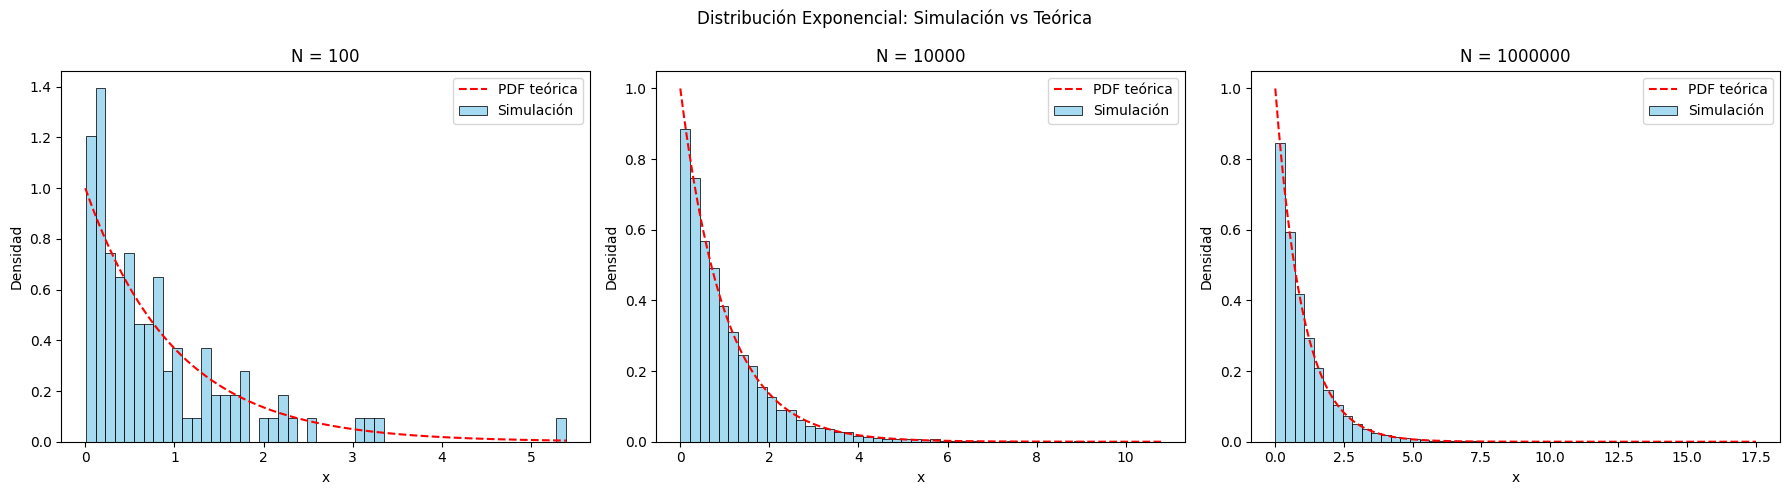

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import expon

# Método de transformación inversa para la exponencial
def simular_exponencial(N, lambda_=1):
    U = np.random.uniform(0, 1, N)
    X = -np.log(U) / lambda_
    return X

# Valores de N
Ns = [10**2, 10**4, 10**6]
lambda_exp = 1

# Gráfico
plt.figure(figsize=(18, 5))

for i, N in enumerate(Ns, 1):
    datos = simular_exponencial(N, lambda_exp)

    plt.subplot(1, 3, i)
    # Histograma como estimación de densidad
    sns.histplot(datos, bins=50, kde=False, stat='density', color='skyblue', label='Simulación')

    # Distribución teórica
    x = np.linspace(0, np.max(datos), 500)
    plt.plot(x, expon.pdf(x, scale=1/lambda_exp), 'r--', label='PDF teórica')

    plt.title(f"N = {N}")
    plt.xlabel("x")
    plt.ylabel("Densidad")
    plt.legend()

plt.suptitle("Distribución Exponencial: Simulación vs Teórica")
plt.tight_layout()
plt.show()


A partir de los gráficos generados, consideramos que las distribuciones más acertadas para el uso del método de transformación inversa son:
- Edad: Distribución Normal
- Nivel de Glucosa: Distribución Gamma

Para estimar los parametros de una normal mediante estimación de momentos, se deben plantear las ecuaciones: 
µ̂:
$$
E[x] = µ̂
$$
$$
µ̂ = \frac{1}{n} \cdot \sum_{i=1}^{n} x_i
$$
σ̂:
$$
Var[X] = σ̂^{2}
$$
$$
σ̂^{2} = \frac{1}{n} \cdot \sum_{i=1}^{n} (x_i - µ̂)^{2}
$$


In [ ]:
#Estimanción de momentos de la edad (distribución normal):
mu_age = df['age'].mean()
sigma_age = df['age'].std(ddof=0)


print(f"MM - Edad → µ̂ = {mu_age:.2f}, σ̂ 2= {sigma_age:.2f}")

NameError: name 'df' is not defined

Para estimar los parametros de una normal mediante máxima verosimiolitud se debe...

In [ ]:
#Estimación máximo verosímilitud de la edad (distribución normal):
from scipy.stats import norm

# Datos de edad
edad = df['age'].dropna()

# MLE estimación con SciPy
mu_mle, sigma_mle = norm.fit(edad)

print(f"Edad ~ Normal(μ = {mu_mle:.2f}, σ = {sigma_mle:.2f})")


Edad ~ Normal(μ = 42.87, σ = 22.55)


Para estimar los parametros de una gamma mediante estimación de momentos se deben plantear las siguientes ecuaciones:
La estimación de momentos plantea que:
$$
E[x] = µ̂
$$
$$
Var[x] = σ^{2}
$$
Y dado que la distribución es gamma se sabe que:
$$
µ̂ = α \cdot β
$$
$$
σ^{2} = α \cdot β^{2}
$$
Resolviendo el sistema de ecuaciones queda que:
β:
$$
β = \frac{σ^{2}}{µ̂}
$$
$$
β = \frac{\frac{1}{n} \cdot \sum_{i=1}^{n} (x_i - µ̂)^{2}}{\frac{1}{n} \cdot \sum_{i=1}^{n} x_i}
$$
α:
$$
α = \frac{µ̂^{2}}{σ^{2}} = \frac{µ̂ }{β}
$$
$$
α = \frac{(\frac{1}{n} \cdot \sum_{i=1}^{n} x_i)^{2}}{\frac{1}{n} \cdot \sum_{i=1}^{n} (x_i - µ̂)^{2}} = \frac{\frac{1}{n} \cdot \sum_{i=1}^{n} x_i}{β}
$$

In [ ]:
# Estimación de momentos de la glucosa (Distribución Gamma)
glucosa = df['avg_glucose_level'].dropna()

# Momentos muestrales (método de los momentos)
media_glucosa = glucosa.mean()
var_glucosa = glucosa.var(ddof=0) 

# Estimación de parámetros:
theta_mm = var_glucosa / media_glucosa       
alpha_mm = media_glucosa / theta_mm         

print("Estimación por método de los momentos (Gamma):")
print(f"α = {alpha_mm:.4f}")
print(f"β = {theta_mm:.4f}")


Estimación por método de los momentos (Gamma):
α = 5.6201
β = 18.7372


Para estimar los parametros de una gamma mediante el método de máxima verosímilitud se debe...

In [ ]:
#Estimación máximo verosímilitud de la glucosa (Distribución Gamma):
from scipy.stats import gamma

glucosa = df['avg_glucose_level'].dropna()

# Ajuste con loc=0
a_mle, loc_mle, scale_mle = gamma.fit(glucosa, floc=0)

print(f"Glucosa ~ Gamma(alpha= {a_mle:.2f}, beta = {scale_mle:.2f})")

Glucosa ~ Gamma(alpha= 7.25, beta = 14.52)


#### Distribución Normal

$$
f(x) = \frac{1}{\sqrt{2\pi \cdot \sigma^2}} \cdot \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
$$

Con los parámetros estimados Metodo de los momentos y Maxima verosimilitud (Coinciden):

$$
f(x) = \frac{1}{\sqrt{2\pi \cdot 22.55^2}} \cdot \exp\left(-\frac{(x - 42.87)^2}{2 \cdot 22.55^2}\right)
$$


#### Distribución Gamma 

$$
f(x) = \frac{1}{\Gamma(\alpha) \cdot \beta^\alpha} x^{\alpha - 1} e^{-x/\beta}, \quad x > 0
$$

Con los parámetros estimados Método de los momentos:

$$
f(x) = \frac{1}{\Gamma(5.6201) \cdot 18.7372^{5.6201}} x^{4.6201} e^{-x/18.7372}
$$

Con los parámetros estimados Método máxima verosimilitud:

$$
f(x) = \frac{1}{\Gamma(7.25) \cdot 14.52^{7.25}} x^{6.25} e^{-x/14.52}
$$


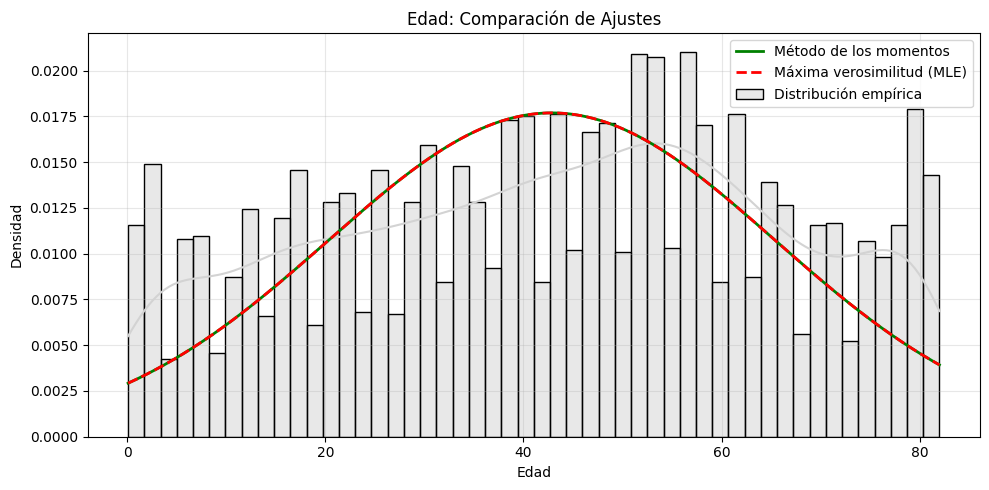

In [ ]:


edad = df['age'].dropna()

# Momentos
mu_mom = mu_age
sigma_mom = sigma_age

# MLE
mu_mle = mu_mle
sigma_mle = sigma_mle

# x y fdp
x = np.linspace(edad.min(), edad.max(), 1000)
pdf_mom = norm.pdf(x, loc=mu_mom, scale=sigma_mom)
pdf_mle = norm.pdf(x, loc=mu_mle, scale=sigma_mle)

plt.figure(figsize=(10, 5))
sns.histplot(edad, stat='density', bins=50, kde=True, label='Distribución empírica', color='lightgray', alpha=0.5)
plt.plot(x, pdf_mom, label='Método de los momentos', color='green', linewidth=2)
plt.plot(x, pdf_mle, label='Máxima verosimilitud (MLE)', color='red', linestyle='--', linewidth=2)

plt.title("Edad: Comparación de Ajustes")
plt.xlabel("Edad")
plt.ylabel("Densidad")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


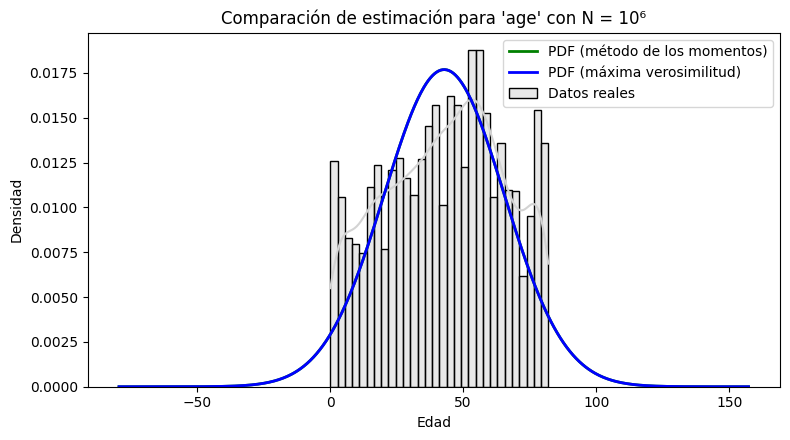

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


N = 10**6

# Simular datos con ambos estimadores
sim_mm  = norm.rvs(loc=mu_age,  scale=sigma_age,  size=N, random_state=rng)
sim_mle = norm.rvs(loc=mu_mle, scale=sigma_mle, size=N, random_state=rng)

# Rango de x para evaluar PDFs
x = np.linspace(min(ages.min(), sim_mm.min(), sim_mle.min()) - 5,
                max(ages.max(), sim_mm.max(), sim_mle.max()) + 5, 600)

# PDF teóricas
pdf_mm  = norm.pdf(x, loc=mu_age,  scale=sigma_age)
pdf_mle = norm.pdf(x, loc=mu_mle, scale=sigma_mle)

# Plot
plt.figure(figsize=(8, 4.5))
sns.histplot(ages, stat="density", bins=30, color="lightgray", label="Datos reales", kde=True)
plt.plot(x, pdf_mm, label="PDF (método de los momentos)", color="green", lw=2)
plt.plot(x, pdf_mle, label="PDF (máxima verosimilitud)", color="blue", lw=2)
plt.title("Comparación de estimación para 'age' con N = 10⁶")
plt.xlabel("Edad")
plt.ylabel("Densidad")
plt.legend()
plt.tight_layout()
plt.show()


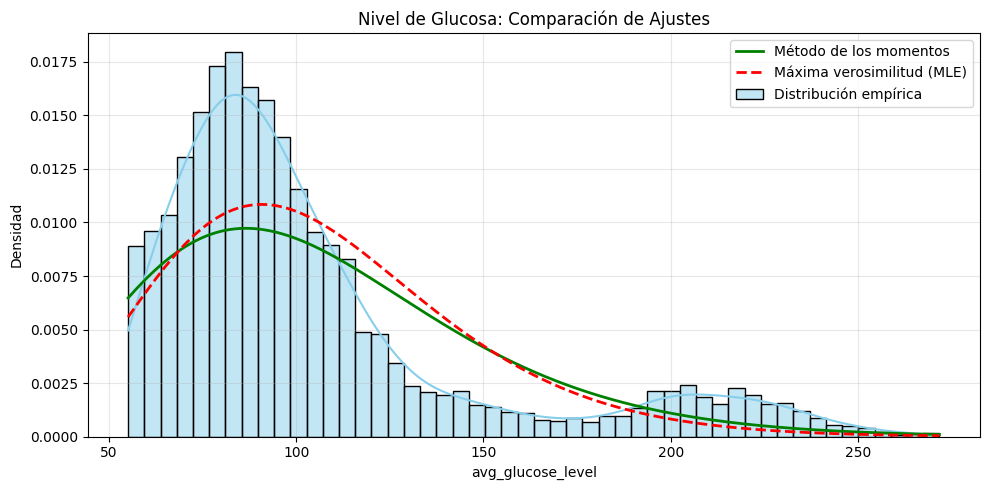

In [ ]:
# 1. Preparar datos
glucosa = df['avg_glucose_level'].dropna()

# 2. Método de los momentos
alpha_mom = alpha_mm 
beta_mom = theta_mm

# 3. Máxima verosimilitud (MLE)
alpha_mle = a_mle
loc_mle = loc_mle
beta_mle = scale_mle

# 4. Rango de valores para evaluar las funciones
x = np.linspace(glucosa.min(), glucosa.max(), 1000)

# 5. FDP teóricas
pdf_mom = gamma.pdf(x, a=alpha_mom, scale=beta_mom)
pdf_mle = gamma.pdf(x, a=alpha_mle, scale=beta_mle)

# 6. Gráfico
plt.figure(figsize=(10, 5))
sns.histplot(glucosa, stat='density', bins=50, kde=True, label='Distribución empírica', color='skyblue', alpha=0.5)
plt.plot(x, pdf_mom, label=f'Método de los momentos', color='green', linewidth=2)
plt.plot(x, pdf_mle, label=f'Máxima verosimilitud (MLE)', color='red', linestyle='--', linewidth=2)

plt.title("Nivel de Glucosa: Comparación de Ajustes")
plt.xlabel("avg_glucose_level")
plt.ylabel("Densidad")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
